# TP2 : Mesure du coefficient de rebond d’une balle
### Auteur : ARGUELLO Camilo

### Introduction

L'objectif de ce TP est d'étudier avec un exemple de chute d'une balle de ping-ping les notions des incertitudes des erreurs systématiques ainsi que des erreurs statistiques. En particulier, à partir des données des temps prises par notre téléphone et l'application [PhyPhox](https://phyphox.org).

L'analyse est faite avec [Python](https://python.org) en utilisant les modules [numpy](https://numpy.org/), [pandas](https://pandas.pydata.org/) et [matplotlib](https://matplotlib.org/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import qexpy

### Mesure des rebonds de la balle et extraction d'une mesure du coefficient de restitution

À l'aide de l'application PhyPhox, on a mesuré le temps produites par les rebonds de la balle de ping-pong qui tombe d'une hauteur $h_0 = 1\text{ m} \pm 0.01\text{ m}$. La balle de ping-pong a une masse de $0.1\text{ kg}$. On a pris 3 fois les mesures de temps de rebond. Les données sont dans le fichier `All.csv`.

<img src="./h_t.jpg" width="400">

In [83]:
# Constantes

g=9.81 # m/s2
m=0.10 # kg (masse d'une balle de ping-pong)
h_0=1.0 # m (hauteur initiale)

In [84]:
# On ajoute le fichier All.csv
data = pd.read_csv('./Acoustic Stopwatch_2023-03-07_15-24-18/All.csv', sep=',')
# On affiche les 5 premières lignes
data.head()

,Event time (s),Interval (s)
0,2.133771,0.785792
1,2.919563,0.668104
2,3.587667,0.578625
3,4.166292,0.509146
4,4.675438,0.454750


Les deux colonnes affichés contiennent l'information liée à:
- `Event time (s)` le temps en seconds de déclénchement à partir des conditions initales comme le bruit au moment de faire l'expériment. On rélatione un rebond comme un évènement.
- `Interval (s)` qui corresponde au temps en seconds de l'interval entre chaque rebond. 


Notre objectif en première terme c'est de vérifier la différence de temps entre chaque rebond, cela va nous permettre de vérifier si l'information qu'on a mesuré est correcte, c'est-à-dire que le bruit n'a pas afecté la prise de mesures.

On va ajouter une nouvelle colonne appelée `diff` avec les informations de différence entre chaque évenement en seconds.

In [85]:
## Pour la première colonne, on calcule la différence de temps entre deux événements

# on calcule la différence de temps entre deux événements
data['diff'] = data['Event time (s)'].diff()
# on supprime la première ligne qui est NaN
data = data.dropna()
# on affiche les 5 premières lignes
data.head()

,Event time (s),Interval (s),diff
1,2.919563,0.668104,0.785792
2,3.587667,0.578625,0.668104
3,4.166292,0.509146,0.578625
4,4.675438,0.454750,0.509146
5,5.130187,0.411521,0.454750


In [86]:
# on verifie que la diff est égale à la colonne Interval (s) 
# Il faut comparer les lignes de cette façon:
# ligne 2: data['diff'] avec ligne 1: data['Interval (s)']
# ligne 3: data['diff'] avec ligne 2: data['Interval (s)']
# ligne 4: data['diff'] avec ligne 3: data['Interval (s)']
# etc.

def interval_diff_compare(data):
    for i in range(1, len(data)):
        if round(data['diff'][i+1], 2) != round(data['Interval (s)'][i], 2):
            return False
    return True

# on verifie que la diff est égale à la colonne Interval (s)
print("La difference de temps est égale à l'intervalle 'Event time (s)': ", interval_diff_compare(data))


La difference de temps est égale à l'intervalle 'Event time (s)':  True


Maintenant, on s'intéresse pour calculer la vitesse entre chaque rebond selon la rélation:

$$ v_i = \frac{g  T_i}{2} $$ 

Où, $g$ c'est la gravité et $T_i$ est l'intervalle de temps, dans notre cas la colonne `diff`.

Pour cela on ajoute une nouvelle colonne `vitesse` dans notre tableau.

In [89]:
## Calcul de la vitesse entre chaque rebond grâce à la formule v_i = g * T_i / 2
data['vitesse'] = g * data['diff'] / 2
# on affiche les 5 premières lignes
data.head()

,Event time (s),Interval (s),diff,vitesse
1,2.919563,0.668104,0.785792,3.854308
2,3.587667,0.578625,0.668104,3.277051
3,4.166292,0.509146,0.578625,2.838156
4,4.675438,0.454750,0.509146,2.497360
5,5.130187,0.411521,0.454750,2.230549


In [90]:
# On calcule le nombre du rebond
data['rebond'] = np.arange(1, len(data)+1)

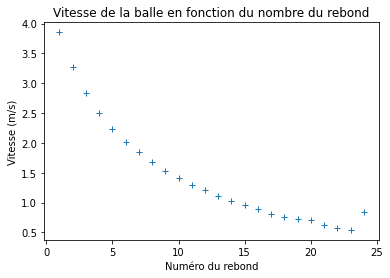

In [98]:
# On trace la vitesse de la balle en fonction du nombre du rebond
plt.plot(data['rebond'], data['vitesse'], '+')
plt.title('Vitesse de la balle en fonction du nombre du rebond')
plt.xlabel('Numéro du rebond')
plt.ylabel('Vitesse (m/s)')
plt.show()

On peut noter que la vitesse entre chaque rebonds a une tendence à diminuer sa valeur. Cela est dû à que l'hauteur pour chaque rebond diminue. C'est à dire que si on analyse la rélation d'energie potentielle de la balle:

$$ E_p = m g h_i $$

Avec $m$ la masse, $h$ la hauteur de la balle. Si on **diminue** la hauteur, alors l'énergie potentielle sera aussi diminuée.

À chaque mouvement on sait que l'énergie potentielle se transforme en énergie cinetique, donc:

$$ E_c = \frac{1}{2}  m  \vec{v}^2 $$

$$ \vec{v} = \sqrt{\frac{2  E_c}{m}} $$

Si la $E_c$ diminue, la vitesse diminuera également.

On considère maintenant l'effet que nos mesures ne sont pas infinitement précises, car dû à des erreurs systématiques (déclenchement du bruit, précision de la mesure, etc) on a un erreur d'environ $\pm 10\text{ ms}$.

Pour calculer l'incertitud sur la vitesse, on prend en compte les incertitudes sur les mesures de temps et l'hauter $h_0$. En utilisant l'équation de propagation des erreurs, on obtient:

$$ \Delta \vec{v}^2 = \left( \frac{\partial \vec{v}}{\partial t} \right)^2 \Delta t^2 + \left( \frac{\partial \vec{v}}{\partial h} \right)^2 \Delta h^2 + 2 \frac{\partial \vec{v}}{\partial t} \frac{\partial \vec{v}}{\partial h} cov(t,h) $$ 

où $\Delta t$ et $\Delta h$ sont les incertitudes sur les mesures de temps et de hauteur respectivement. On a aussi $cov(t,h)$ qui est la covariance entre les mesures de temps et de la hauteur.

De même, on utilise l'équation de la de la chute libre :

$$h = h_0 + v_0t - \frac{1}{2}gt^2$$

D'où on obtient:

$$\frac{\partial \vec{v}}{\partial t} = -g \quad \frac{\partial \vec{v}}{\partial h} = 0$$

En utilisant la formule de propagation des erreurs et en vérifient que la  covariance entre les mesures de temps et de hauteur est nulle, on obtient:

$$ \Delta \vec{v}^2 = \left( -g \right)^2 \Delta t^2 $$

Ainsi, l'incertitude sur la vitesse peut être calculée comme:

$$ \Delta \vec{v} = \sqrt{ \left( -g \right)^2 \Delta t^2 } $$

En substituant les valeurs numériques, on obtient:

$$ \Delta \vec{v} = \sqrt{ \left( -9.81 \right)^2 \times 0.0001 } = 0.0981 \text{ m/s} $$


In [99]:
# on calcule l'erreur sur la vitesse selon \sqrt{ \left( -g \right)^2 \Delta t^2 }
delta_t = .01 # s
erreur_vitesse = np.sqrt( (-g)**2 * (delta_t)**2 )
print("L'erreur maximale sur la vitesse est de: ", erreur_vitesse, "m/s")

L'erreur maximale sur la vitesse est de:  0.0981 m/s


In [100]:
# On calcule l'erreru sur la vitesse pour CHAQUE REBOUND selon \sqrt{ \left( -g \right)^2 \Delta t^2 }

data['vitesse_err'] = np.sqrt( (-g)**2 * (data['diff'] * erreur_vitesse)**2 )
# on affiche les 5 premières lignes
data.head()

,Event time (s),Interval (s),diff,vitesse,rebond,vitesse_err
1,2.919563,0.668104,0.785792,3.854308,1,0.756215
2,3.587667,0.578625,0.668104,3.277051,2,0.642957
3,4.166292,0.509146,0.578625,2.838156,3,0.556846
4,4.675438,0.454750,0.509146,2.497360,4,0.489982
5,5.130187,0.411521,0.454750,2.230549,5,0.437634


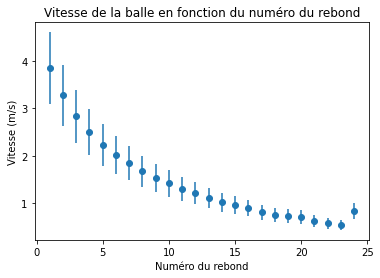

In [101]:
# On trace la vitesse de la balle en fonction du numéro du rebond

plt.errorbar(data['rebond'], data['vitesse'], yerr=data['vitesse_err'], fmt='o')
plt.title('Vitesse de la balle en fonction du numéro du rebond')
plt.xlabel('Numéro du rebond')
plt.ylabel('Vitesse (m/s)')
plt.show()

On peut noter que à chaque rebond, une partie de l'énergie cinétique de la balle est convertie en énergie potentielle élastique, puis restituée sous forme d'énergie cinétique lorsqu'elle rebondit. Cette perte d'énergie cinétique peut contribuer à réduire la vitesse de la balle, ce qui peut réduire l'erreur sur la vitesse mesurée. Cela explique pourquoi l'erreur sur la vitesse diminue à chaque rebond.

Maintenant on s'intéresse pour déterminer le coefficient de restitution $k$ de la balle de ping-pong. On sait que:

$$ k = \frac{E_{\text{cinétique après rebond}}}{E_{\text{cinétique avant rebond}}} = \frac{E_c}{E_c'} $$

L'énergie cinétique de la balle le rebond est donnée par :

$$ E_c = \frac{1}{2} m \vec{v}^2 $$

L'énergie total du système est donnée par:

$$ E_c + E_p = E_c' + E_p' + E_d $$

Où $E_p$ est l'énergie potentielle de la balle avant le rebond, $E_p'$ celle après le rebond, et $E_d$ est l'énergie dissipée par la balle pendant le rebond. On peut montrer que les énergies potentielles sont les mêmes avant et après le rebond, donc:

$$ E_c = E_c' + E_d $$

Alors l'énergie dissipée par la balle pendant le rebond est donnée par:

$$ E_d = E_c - E_c' $$

On peut aussi montrer que l'énergie dissipée par la balle pendant le rebond est donnée par:

$$ E_d = \frac{1}{2} m \vec{v}^2 - \frac{1}{2} m \vec{v'}^2 $$

Où $\vec{v'}$ est la vitesse de la balle dans le rebond $i-1$.

In [102]:
# on va mesurer le coefficient de restitution d’une balle de ping-pong en la faisant rebondir sur le sol et en mesurant le temps entre chaque rebond
# le coefficient de restitution est donné par la formule: k = E_cinetique après rebond / E_cinetique avant rebond

# on calcule l'énergie cinétique pour chaque rebond Ec = (1/2) * m * v^2
data['E_cinetique'] = (1/2) * m * (data['vitesse'] ** 2)
data['E_dissipee'] = np.zeros(len(data)) # helper pour créer une colonne de 0

for i in range(2, len(data)):
    # df['E_dissipee'] = Ec[i] - Ec'[i-1]
    data.loc[i,'E_dissipee'] = (1/2) * m * (data['vitesse'][i] ** 2) - (1/2) * m * (data['vitesse'][i-1] ** 2)

# on calcule le coefficient de restitution k
data['k'] = data['E_cinetique'] + data['E_dissipee'] / data['E_cinetique']

# on affiche les 5 premières lignes
data.head()

,Event time (s),Interval (s),diff,vitesse,rebond,vitesse_err,E_cinetique,E_dissipee,k
1,2.919563,0.668104,0.785792,3.854308,1,0.756215,0.742785,0.000000,0.742785
2,3.587667,0.578625,0.668104,3.277051,2,0.642957,0.536953,-0.205831,0.153621
3,4.166292,0.509146,0.578625,2.838156,3,0.556846,0.402756,-0.134197,0.069560
4,4.675438,0.454750,0.509146,2.497360,4,0.489982,0.311840,-0.090916,0.020294
5,5.130187,0.411521,0.454750,2.230549,5,0.437634,0.248767,-0.063073,-0.004775


Maintenant, on s'interesse pour calculer l'incertitud sur le coefficient de restitution $K$., on prend en compte l'incertitud sur les mesures de temps. En utilisant l'équation de propagation des erreurs, on obtient:

$$ \Delta K^2 = \left( \frac{\partial K}{\partial t} \right)^2 \Delta t^2  $$ 

où $\Delta t$ est l'incertitude sur la mesure de temps, alors on obtient:

$$ \Delta K = \sqrt{ \left( \frac{\partial K}{\partial t} \right)^2 \Delta t^2 } $$

Où, on peut réssoudre l'équation pour déterminer $\frac{\partial K}{\partial t}$:

$$ = \frac{\partial K}{\partial t} $$

$$ = \frac{\partial \frac{E_c}{E_c'}}{\partial t} $$

Où, $E_c'$ est l'énergie cinetique de la balle dans le rebond $i$. $E_c'$ celle à le rebond $i-1$.

$$ = \frac{\partial \frac{\frac{1}{2} m \vec{v}^2}{\frac{1}{2} m \vec{v'}^2}}{\partial t} $$

Où, $\vec{v}$ est la vitesse de la balle dans le rebond $i$, et $\vec{v'}$ celle dans le rebond $i-1$.

$$ \frac{\partial E_c}{\partial t} = \frac{\partial}{\partial t}\left(\frac{1}{2}m\vec{v}^2\right) = m\vec{v}\cdot\frac{\partial \vec{v}}{\partial t} $$

et

$$ \frac{\partial E_c'}{\partial t} = \frac{\partial}{\partial t}\left(\frac{1}{2}m\vec{v'}^2\right) = m\vec{v'}\cdot\frac{\partial \vec{v'}}{\partial t} $$

Ainsi, on savait que $\frac{\partial \vec{v}}{\partial t} = -g $, donc:

$$ \frac{\partial E_c}{\partial t} = -mg\vec{v} $$

et 

$$ \frac{\partial E_c'}{\partial t} = -mg\vec{v'} $$

Donc, on obtient:

$$ \Delta K = \sqrt{ \left( \frac{\vec{v}}{\vec{v'}} \right)^2 \Delta t^2 } $$

In [103]:
# On calcule l'erreur sur le coefficient de restitution

data['k_err'] = np.zeros(len(data)) # helper pour créer une colonne de 0

for i in range(2, len(data)):
    data.loc[i,'k_err'] = np.sqrt( (data['vitesse'][i] / data['vitesse'][i-1])**2 * (data['diff'][i])**2 )

# on affiche les 5 premières lignes
data.head()

,Event time (s),Interval (s),diff,vitesse,rebond,vitesse_err,E_cinetique,E_dissipee,k,k_err
1,2.919563,0.668104,0.785792,3.854308,1,0.756215,0.742785,0.000000,0.742785,0.000000
2,3.587667,0.578625,0.668104,3.277051,2,0.642957,0.536953,-0.205831,0.153621,0.568043
3,4.166292,0.509146,0.578625,2.838156,3,0.556846,0.402756,-0.134197,0.069560,0.501130
4,4.675438,0.454750,0.509146,2.497360,4,0.489982,0.311840,-0.090916,0.020294,0.448009
5,5.130187,0.411521,0.454750,2.230549,5,0.437634,0.248767,-0.063073,-0.004775,0.406166


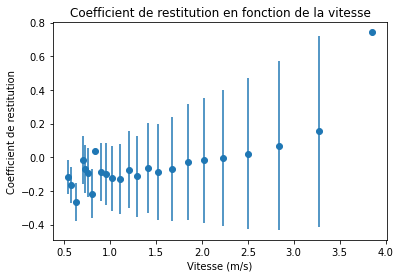

In [104]:
plt.errorbar(data['vitesse'], data['k'], yerr=data['k_err'], fmt='o')
plt.title('Coefficient de restitution en fonction de la vitesse')
plt.xlabel('Vitesse (m/s)')
plt.ylabel('Coefficient de restitution')
plt.show()

L'incertitude sur le coefficient de restitution $K$ montre qu'au début de la chute de la balle de ping-pong, il y a un temps important pour que la vitesse puisse être mesurée malgré le bruit, donc l'énergie cinétique peut être calculée avec précision. Cependant, lorsque la balle commence à rebondir plus rapidement, la précision diminue en raison de la rapidité des rebonds. Par conséquent, le calcul de l'énergie cinétique et du coefficient de restitution devient de plus en plus difficile.

### Comparaison avec les résultats de QExPy

Maintent, à l'aide du module [QuexPy](https://qexpy.readthedocs.io/en/latest/intro.html) on peut calculer l'incertitude sur les valeurs de $\vec{v}$.

In [105]:
# On fait la conversion en array pour qexpy 
vitesse = data['vitesse'].to_numpy()
vitesse_err = data['vitesse_err'].to_numpy()
# On crée un array de mesure de vitesse
vitesse_mes=qexpy.MeasurementArray(vitesse, error=vitesse_err, unit="m/s", name="vitesse")
# On affiche les mesures
print("Vitesses = ", vitesse_mes)

Vitesses =  vitesse = [ 3.9 +/- 0.8, 3.3 +/- 0.6, 2.8 +/- 0.6, 2.5 +/- 0.5, 2.2 +/- 0.4, 2.0 +/- 0.4, 1.8 +/- 0.4, 1.7 +/- 0.3, 1.5 +/- 0.3, 1.4 +/- 0.3, 1.3 +/- 0.3, 1.2 +/- 0.2, 1.1 +/- 0.2, 1.0 +/- 0.2, 1.0 +/- 0.2, 0.9 +/- 0.2, 0.8 +/- 0.2, 0.8 +/- 0.1, 0.7 +/- 0.1, 0.7 +/- 0.1, 0.6 +/- 0.1, 0.6 +/- 0.1, 0.5 +/- 0.1, 0.8 +/- 0.2 ] (m⋅s^-1)


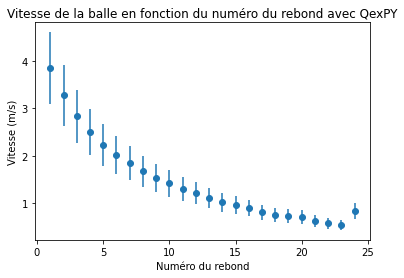

In [106]:
plt.errorbar(data['rebond'], vitesse_mes.values, yerr=vitesse_mes.errors, fmt='o')
plt.title('Vitesse de la balle en fonction du nombre du rebond avec QexPY')
plt.xlabel('Rebonds')
plt.ylabel('Vitesse (m/s)')
plt.show()

In [113]:

def vitesse_error_compare(data, vitesse_mes):
    """
    Cette fonction compare l'erreur sur la vitesse avec QexPY et l'erreur sur la vitesse calculée à la main
    """
    for i in range(1, len(data)):
        if vitesse_mes.errors[i] == data['vitesse_err'][i+1]:
            return True
    return False

print("L'erreur sur la vitesse est égale à l'erreur sur la vitesse avec QexPY: ", vitesse_error_compare(data, vitesse_mes))

L'erreur sur la vitesse est égale à l'erreur sur la vitesse avec QexPY:  True


On remarque que l'incertitude trouvé à l'aide de `QuexPy` et celle trouvé à l'aide de la formule de propagation des erreurs sont les mêmes.

### Extraction d’une erreur statistique sur les coefficients de restitution

Nombre de fichiers lus:  3


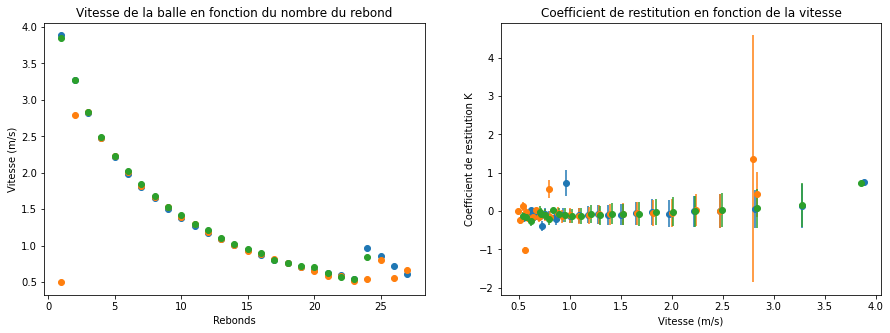

In [125]:
# on crée une liste vide pour stocker les données
data_list = []

# on crée une liste de tous les fichiers à lire
dataset_list = ['./Acoustic Stopwatch_2023-03-07_15-26-31/All.csv', './Acoustic Stopwatch_2023-03-07_15-27-22/All.csv', './Acoustic Stopwatch_2023-03-07_15-24-18/All.csv']

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

# on lit tous les fichiers
for dataset in dataset_list:
    data = pd.read_csv(dataset, sep=',')
    data['diff'] = data['Event time (s)'].diff()
    # on supprime la première ligne qui est NaN
    data = data.dropna()
    
    # On calcule le nombre du rebond
    data['rebond'] = np.arange(1, len(data)+1)
    # on calcule la vitesse
    data['vitesse'] = g * data['diff'] / 2

    ax1.plot(data['rebond'], data['vitesse'], 'o', label=dataset)
    ax1.set_title('Vitesse de la balle en fonction du nombre du rebond')
    ax1.set_xlabel('Rebonds')
    ax1.set_ylabel('Vitesse (m/s)')

    # On calcule K
    data['E_cinetique'] = (1/2) * m * (data['vitesse'] ** 2)
    data['E_dissipee'] = np.zeros(len(data)) # helper pour créer une colonne de 0
    
    for i in range(2, len(data)):
        # df['E_dissipee'] = Ec[i] - Ec'[i-1]
        data.loc[i,'E_dissipee'] = (1/2) * m * (data['vitesse'][i] ** 2) - (1/2) * m * (data['vitesse'][i-1] ** 2)

    # on calcule le coefficient de restitution k
    data['k'] = data['E_cinetique'] + data['E_dissipee'] / data['E_cinetique']

    # on calcule l'erreur sur le coefficient de restitution
    data['k_err'] = np.zeros(len(data)) # helper pour créer une colonne de 0
    for i in range(2, len(data)):
        data.loc[i,'k_err'] = np.sqrt( (data['vitesse'][i] / data['vitesse'][i-1])**2 * (data['diff'][i])**2 )

    # On trace ax.plot( data['vitesse'], data['k'], 'o')
    ax2.errorbar(data['vitesse'], data['k'], yerr=data['k_err'], fmt='o')
    ax2.set_title('Coefficient de restitution en fonction de la vitesse')
    ax2.set_xlabel('Vitesse (m/s)')
    ax2.set_ylabel('Coefficient de restitution K')

    # on ajoute les données à la liste
    data_list.append(data)

# length of the list
data_list_len = len(data_list)
print("Nombre de fichiers lus: ", data_list_len)

In [165]:
k_list = list()
k_err_list = list()
for i in range(1, len(data_list)):
    k = data_list[i]['k']
    k_err = data_list[i]['k_err']
    k_list.append(k.to_numpy())
    k_err_list.append(k_err.to_numpy())

## flat list
k_list = [item for sublist in k_list for item in sublist]
k_err_list = [item for sublist in k_err_list for item in sublist]

# Calcul de la moyenne et de l'écart type des valeurs de K
K_values = qexpy.MeasurementArray(k_list, error=k_err_list, unit="", name="K")
K_mean = qexpy.mean(K_values)
K_std = np.std(K_values, ddof=1)

# Calcul de l'incertitude sur la moyenne des valeurs de K
delta_K_mean = K_std / qexpy.sqrt(len(K_values))

# Affichage des résultats
print("Moyenne des valeurs de K = '{}'".format(K_mean))
print("Incertitude sur la moyenne des valeurs de K = {:.3f}".format(delta_K_mean))
print("Incertitude combinée sur toutes les mesures de K = {:.3f}".format(K_std))

Moyenne des valeurs de K = 'mean of K = -0.03 +/- 0.04'
Incertitude sur la moyenne des valeurs de K = 0.042
Incertitude combinée sur toutes les mesures de K = 0.299


On voit que à partir de toutes les mesures, on obtient une distribution de valeurs pour le coefficient de restitution $K$ avec une valeur moyenne de `-0.03`et une incertitude de `0.042`. Aussi on a calculé l'incertitude combinée sur l'écart-type de la distribution de valeurs de $K \pm 0.299 $.

Pour faire l'analyse de mesures on a utilisé le module [MonteCarloSettings](https://qexpy.readthedocs.io/en/latest/_modules/qexpy/data/utils.html#MonteCarloSettings) de `QuexPy`. Ce module permet de faire l'analyse de mesures en utilisant la méthode de Monte Carlo (qui qui permet de propager l'incertitude associée à des mesures individuelles à des fonctions mathématiques complexes). On peut utiliser ce module pour calculer l'incertitude sur les coefficients de restitution $K$. 

### Conclusion

Un exemple simple comme la chute d'une balle de ping-pong montre que l'incertitude sur les mesures de temps peut avoir un impact important sur l'incertitude sur le coefficient de restitution. On a calculé l'incertitude sur la vitesse de la balle à l'aide de la formule de propagation des erreurs et à l'aide du module [QuexPy](https://qexpy.readthedocs.io/en/latest/intro.html). On a remarqué que les deux méthodes donnent les mêmes résultats. 

L'analyse des énergies cinetiques avant et après le rebond montre qu'on peut obtenir le rapport de restitution $K$ qui va nous permettre d'obtenir la fiabilité du modèle. La bibliothéque QuexPy permet aussi faire l'analyse des erreurs statistiques à l'aide de la méthode de Monte Carlo, cependant, il manqué des mesures pour obtenir un résultat fiable.